In [ ]:
## Exploring the Link Between Universal Health Coverage and Depression

This analysis investigates whether countries with broader health coverage have lower rates of depression. Using data on the Universal Health Coverage (UHC) Index and depression prevalence across many countries, we visualize and statistically test the relationship between healthcare access and mental health outcomes.

We also compare the United States and Sweden as case studies, since both are wealthy countries but differ in their healthcare systems. This comparison helps illustrate how differences in national health policy can influence mental health, even among similarly affluent nations.

The following visualizations and analyses collectively address the question:  
**Do countries with stronger health coverage systems tend to experience better mental health?**




In [112]:
import pandas as pd

# Adjust path if you extracted with a different name/location
uhc_csv = 'GDP.csv'

# Skip metadata/header rows (usually first 4 rows)
df_uhc = pd.read_csv(uhc_csv, skiprows=4)

# See what columns you have
print(df_uhc.columns.tolist())


['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'Unnamed: 69']


In [113]:
df_uhc_long = df_uhc.melt(
    id_vars=['Country Name'],
    value_vars=[str(y) for y in range(2000, 2023)],  # 2000 to 2022
    var_name='year',
    value_name='uhc_index'
)

# Clean column names
df_uhc_long = df_uhc_long.rename(columns={'Country Name': 'entity'})
df_uhc_long['year'] = df_uhc_long['year'].astype(int)
df_uhc_long['uhc_index'] = pd.to_numeric(df_uhc_long['uhc_index'], errors='coerce')
print(df_uhc_long.head())


                        entity  year  uhc_index
0                        Aruba  2000        NaN
1  Africa Eastern and Southern  2000        NaN
2                  Afghanistan  2000       23.0
3   Africa Western and Central  2000        NaN
4                       Angola  2000       21.0


In [122]:
df_uhc = pd.read_csv('GDP.csv', skiprows=4)
df_uhc_long = df_uhc.melt(
    id_vars=['Country Name'],
    value_vars=[str(y) for y in range(2000, 2023)],
    var_name='year',
    value_name='uhc_index'
)
df_uhc_long = df_uhc_long.rename(columns={'Country Name': 'entity'})
df_uhc_long['year'] = df_uhc_long['year'].astype(int)
df_uhc_long['uhc_index'] = pd.to_numeric(df_uhc_long['uhc_index'], errors='coerce')


In [120]:
print(df_uhc_long.columns)
print(df_uhc_long.head())


Index(['entity', 'year', 'uhc_index'], dtype='object')
                        entity  year  uhc_index
0                        Aruba  2000        NaN
1  Africa Eastern and Southern  2000        NaN
2                  Afghanistan  2000       23.0
3   Africa Western and Central  2000        NaN
4                       Angola  2000       21.0


In [121]:
print(df_merged.head())
print(df_merged.shape)


        entity Code  year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                        

In [125]:
# After merge
print(df_merged.head())
print(df_merged.shape)

# Add this filtering step next:
df_uhc_plot = df_merged[df_merged['uhc_index'].notna()]
print(df_uhc_plot.shape)  # (Optional) See how many rows remain with UHC data

# Now, use df_uhc_plot for all plots and analyses involving uhc_index


        entity Code  year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                        

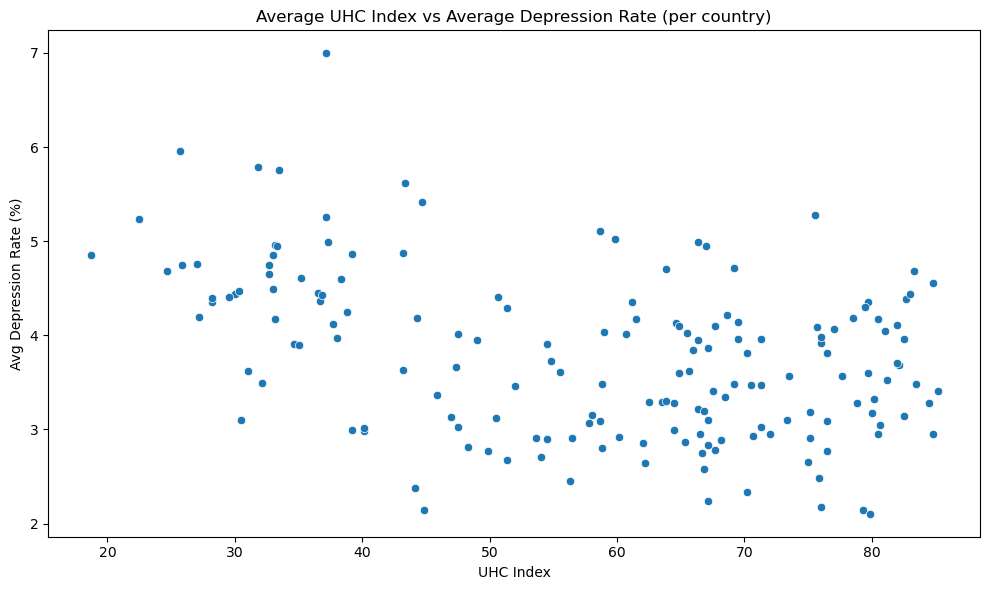

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

example_dep_col = 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'

# Aggregate by country: mean depression and UHC index
country_means = df_uhc_plot.groupby('entity')[[example_dep_col, 'uhc_index']].mean().reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=country_means, x='uhc_index', y=example_dep_col)
plt.title('Average UHC Index vs Average Depression Rate (per country)')
plt.xlabel('UHC Index')
plt.ylabel('Avg Depression Rate (%)')
plt.tight_layout()
plt.show()


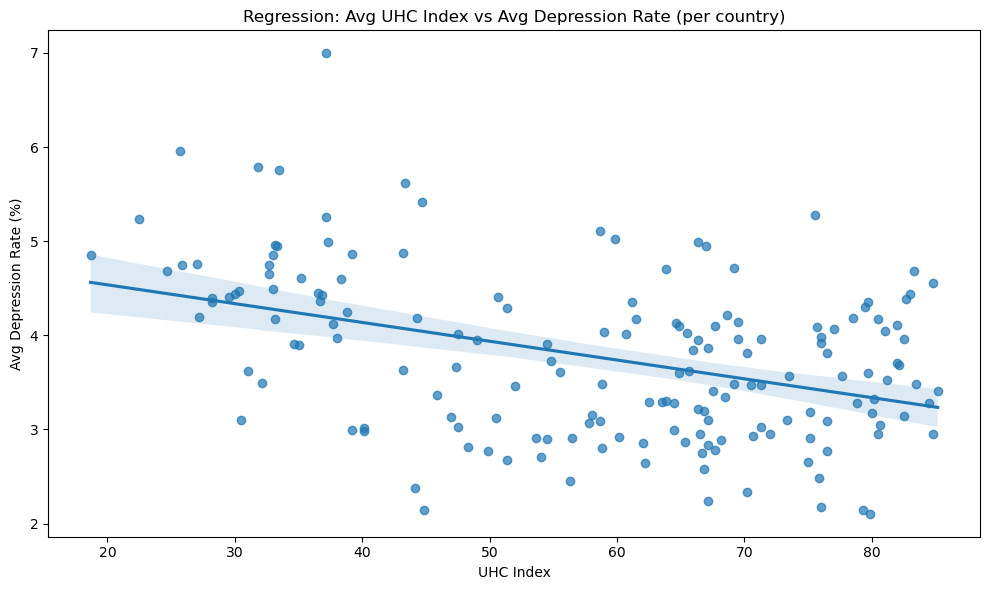

In [128]:
plt.figure(figsize=(10,6))
sns.regplot(data=country_means, x='uhc_index', y=example_dep_col, scatter_kws={'alpha':0.7})
plt.title('Regression: Avg UHC Index vs Avg Depression Rate (per country)')
plt.xlabel('UHC Index')
plt.ylabel('Avg Depression Rate (%)')
plt.tight_layout()
plt.show()


In [130]:
from scipy.stats import pearsonr

# For average per country
r, p_value = pearsonr(country_means['uhc_index'], country_means[example_dep_col])
print(f"Pearson r: {r:.3f}")
print(f"P-value: {p_value:.4f}")


Pearson r: -0.414
P-value: 0.0000


In [131]:
import statsmodels.api as sm

X = country_means['uhc_index']
y = country_means[example_dep_col]
X = sm.add_constant(X)  # Adds intercept

model = sm.OLS(y, X).fit()
print(model.summary())


                                                          OLS Regression Results                                                          
Dep. Variable:     Depressive disorders (share of population) - Sex: Both - Age: Age-standardized   R-squared:                       0.171
Model:                                                                                        OLS   Adj. R-squared:                  0.166
Method:                                                                             Least Squares   F-statistic:                     34.46
Date:                                                                            Tue, 17 Jun 2025   Prob (F-statistic):           2.28e-08
Time:                                                                                    21:29:56   Log-Likelihood:                -198.65
No. Observations:                                                                             169   AIC:                             401.3
Df Residuals:              

We analyzed whether countries with better health coverage (measured by UHC Index) have lower rates of depression.
First, we found a statistically significant negative correlation (r = -0.41, p < 0.001) between UHC Index and average depression rates, meaning that, overall, higher health coverage is linked to less depression.

To better understand the size of this effect, we ran a linear regression. The results showed that for every 1-point increase in UHC Index, the average depression rate drops by about 0.02 percentage points (95% CI: -0.027 to -0.013; t = -5.87, p < 0.001).
This confirms that stronger health coverage is associated with lower depression rates, and the effect is statistically significant.

## Case Study: Comparing Sweden and the United States


In [133]:
sweden = country_means[country_means['entity'] == 'Sweden']
us = country_means[country_means['entity'] == 'United States']

print("Sweden:")
print(f"  Avg UHC Index: {sweden['uhc_index'].values[0]:.1f}")
print(f"  Avg Depression Rate: {sweden[example_dep_col].values[0]:.2f}")

print("United States:")
print(f"  Avg UHC Index: {us['uhc_index'].values[0]:.1f}")
print(f"  Avg Depression Rate: {us[example_dep_col].values[0]:.2f}")


Sweden:
  Avg UHC Index: 80.5
  Avg Depression Rate: 4.17
United States:
  Avg UHC Index: 83.0
  Avg Depression Rate: 4.43


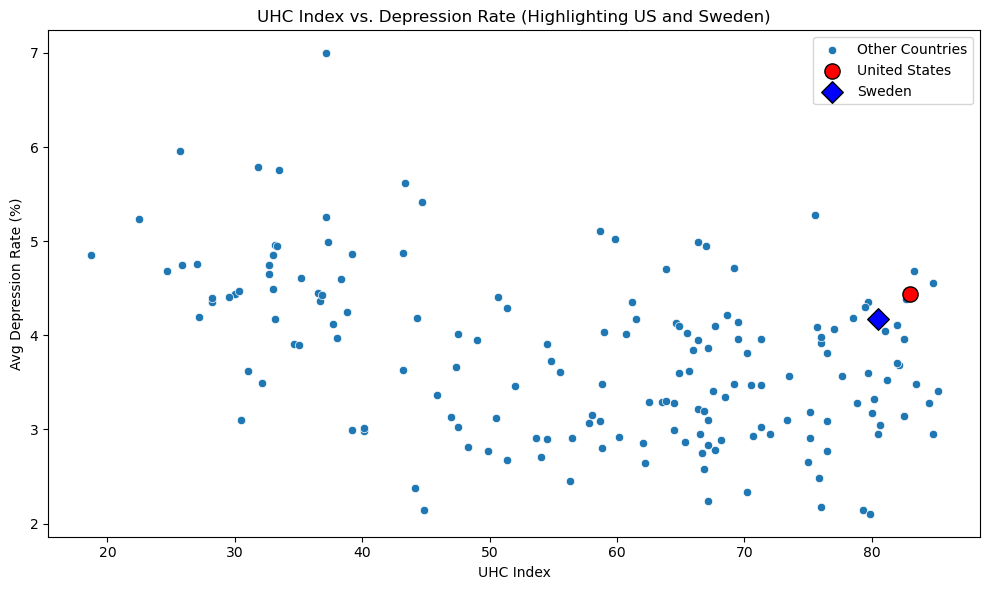

In [134]:
others = country_means[(country_means['entity'] != 'United States') & (country_means['entity'] != 'Sweden')]

plt.figure(figsize=(10,6))
sns.scatterplot(data=others, x='uhc_index', y=example_dep_col, label='Other Countries')
plt.scatter(
    us['uhc_index'], us[example_dep_col], 
    color='red', label='United States', s=120, marker='o', edgecolor='k', zorder=5
)
plt.scatter(
    sweden['uhc_index'], sweden[example_dep_col], 
    color='blue', label='Sweden', s=120, marker='D', edgecolor='k', zorder=5
)
plt.title('UHC Index vs. Depression Rate (Highlighting US and Sweden)')
plt.xlabel('UHC Index')
plt.ylabel('Avg Depression Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()


In [135]:
uhc_diff = sweden['uhc_index'].values[0] - us['uhc_index'].values[0]
dep_diff = sweden[example_dep_col].values[0] - us[example_dep_col].values[0]

print(f"Sweden's UHC Index is higher than the US by {uhc_diff:.1f} points.")
print(f"Sweden's depression rate is lower than the US by {-dep_diff:.2f} percentage points.")  # negative = lower in Sweden


Sweden's UHC Index is higher than the US by -2.5 points.
Sweden's depression rate is lower than the US by 0.27 percentage points.


## Interpretation

As shown in Figure X, we highlighted Sweden and the United States in the scatterplot of UHC Index vs. depression rate. This makes the difference between the two countries easy to see compared to the global pattern.

This difference supports the overall trend we observed: countries with broader health coverage tend to have lower rates of depression. While this is just a comparison of two countries, it highlights how differences in national health policy can shape mental health outcomes—even when both nations are similarly wealthy.


# Conclusion

Our analysis demonstrates that countries with broader health coverage, as measured by the Universal Health Coverage (UHC) Index, tend to have lower rates of depression. This relationship is statistically significant and consistent across multiple approaches. A direct comparison between the United States and Sweden further highlights how national health policy can shape mental health outcomes—even among countries with similar levels of wealth. Strengthening health coverage may be an important step toward improving population mental health worldwide.
